<a href="https://colab.research.google.com/github/IshanAhluwalia/ML-Animal-Classification/blob/main/ML_Backed_Animal_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *
from pathlib import Path

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

100%|██████████| 656M/656M [00:08<00:00, 82.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5


In [ ]:
path = Path('/kaggle/input/animal-image-dataset-90-different-animals')  # <‑‑ adjust if needed
path = Path("/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5")
assert path.exists(), "Make sure this matches the printed download path!"
path.ls().sorted()[:10]

(#2) [Path('/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals'),Path('/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/name of the animals.txt')]

First image: /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals/antelope/02f4b3be2d.jpg


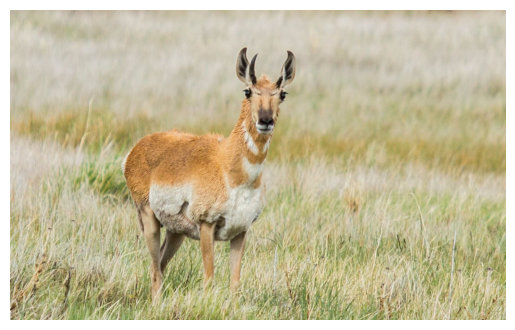

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

animals_folder = Path(
    "/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals"
)

all_imgs = sorted(animals_folder.glob("**/*.jpg"))

first_img_path = all_imgs[0]
print("First image:", first_img_path)

img = mpimg.imread(first_img_path)
plt.imshow(img)
plt.axis("off")
plt.show()


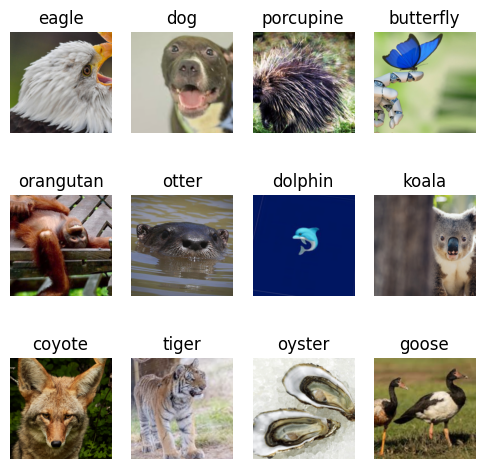

In [ ]:
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,             # 20 % validation split
    seed=42,                   # makes the split reproducible
    item_tfms=Resize(460),     # like Jeremy: resize *before* batching
    batch_tfms=aug_transforms(size=224) + [Normalize.from_stats(*imagenet_stats)],
)

dls.show_batch(max_n=12, figsize=(6,6))

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)  # default pretrained=True
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,3.077685,0.647428,0.815741,01:17


epoch,train_loss,valid_loss,accuracy,time
0,0.843607,0.407405,0.883333,01:19
1,0.578315,0.322277,0.920370,01:18
2,0.363099,0.290069,0.918519,01:18


In [30]:
from fastai.vision.all import *

# Replace 'path/to/your/image.jpg' with the actual path to your image file
image_path = Path('/content/images.jpeg')

# Predict the animal in the image
whatanimal,_,probs = learn.predict(image_path)
print(f"This is a: {whatanimal}.")

# Get the probability of the predicted class
predicted_class_index = learn.dls.vocab.o2i[whatanimal]
predicted_probability = probs[predicted_class_index]

print(f"Probability it's a {whatanimal}: {predicted_probability:.4f}")

This is a: lizard.
Probability it's a lizard: 0.6912
